# Regression

## In this Lesson
* Regression Fundamentals
* General Line Fitting
* Scikit-learn
* Regression as Machine Learning
* Multi-Variate Regression
* One-Hot Encoding


# Regression Fundametals

Regression is a technique commonly used to find lines of best fit for data sets. The most common regression method is [Least Squares Regression](https://www.mathsisfun.com/data/least-squares-regression.html)

For this lesson, I'm going to work through an example.

We will use the London Underground travel times dataset from [this freedom of information request](https://www.whatdotheyknow.com/request/distance_between_adjacent_underg) (as featured in other lessons).


First read in and plot our data. We will be looking to predict the expected travel time for a given station distance.

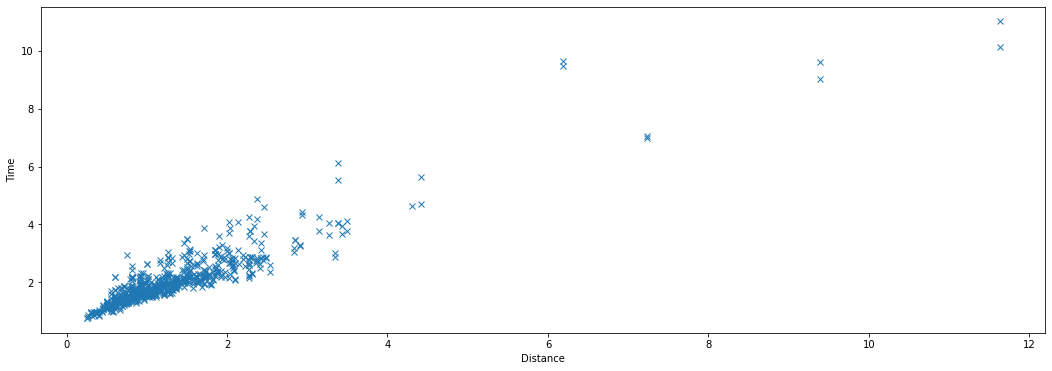

In [3]:

# Import pandas
import pandas as pd

# Import matplot lib
import matplotlib.pyplot as plt

# Read excel with pandas
df = pd.read_excel("../data/Inter station database.xls", sheet_name="Runtime", skiprows=1)

# Plot a scatter plot for the data we want to model
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.xlabel("Distance")
plt.ylabel("Time")
plt.show()


As you can see, our data looks pretty linear, first, let's take a guess at what a good line of best fit might be.

To do this, we are going to define a function for a straight line, `y = mx + c`

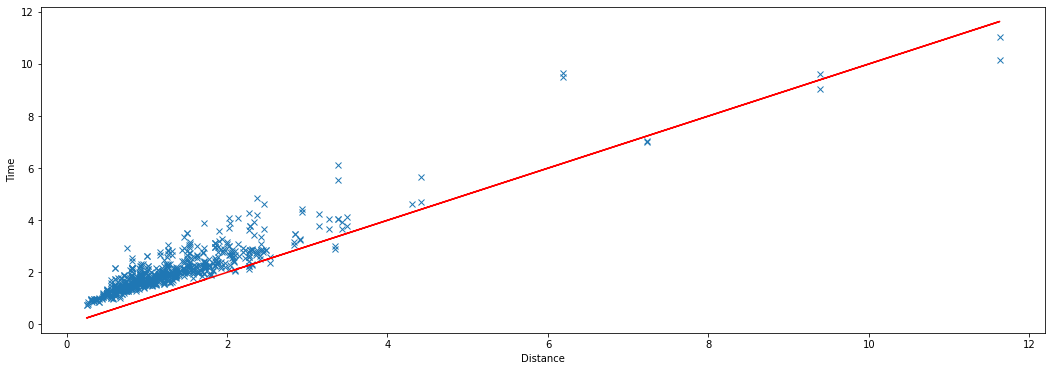

In [6]:

# Define a function for our straight line
def straight_line(x, m, c):
    return m*x + c

# Guess some values for m and c
m_guess = 1
c_guess = 0

# Use our function to calculate a new column in our dataframe with the guess values
# In this case, 'x' is distance
df["guess"] = df["Distance (Kms)"].apply(lambda x: straight_line(x, m_guess, c_guess))

# Plot our guess line against the data
fig, ax = plt.subplots(figsize=(18, 6))
# Data first
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers

# Now our guess line
plt.plot(df["Distance (Kms)"], df["guess"], color="red")

# And display
plt.xlabel("Distance")
plt.ylabel("Time")
plt.show()


Not terreble for a first guess, but is there a way we can quantify exactly how good/bad it is?

## Question

Discuss how might we measure the goodness of this line?

## Answer
(Well, an answer)

We can use something known as the square of the residuals.

The residual is defined as the difference between our guess and the true value.

Squaring the residual helps by both ensuring all values are positive and by producing larger values for large residuals (penalising them more in the optimisation).

## Exercise

Add a column for the squared residuals to our dataframe.

In [ ]:

# Display function to view data (jupyter notebooks only)
from IPython.display import display









# Display
display(df)


## Solution

In [7]:

# Display function to view data (jupyter notebooks only)
from IPython.display import display

df["residual"] = df["Un-impeded Running Time (Mins)"] - df["guess"]

df["r_squared"] = df["residual"] ** 2

# Display
display(df)


,Line,Direction,Station from (A),Station to (B),Distance (Kms),Un-impeded Running Time (Mins),AM peak (0700-1000) Running Time (Mins),Inter peak (1000 - 1600) Running time (mins),guess,residual,r_squared
0,Bakerloo,Southbound,HARROW & WEALDSTONE,KENTON,1.74,2.233333,2.500000,2.500000,1.74,0.493333,0.243378
1,Bakerloo,Southbound,KENTON,SOUTH KENTON,1.40,1.883333,2.000000,2.000000,1.40,0.483333,0.233611
2,Bakerloo,Southbound,SOUTH KENTON,NORTH WEMBLEY,0.90,1.500000,1.500000,1.500000,0.90,0.600000,0.360000
3,Bakerloo,Southbound,NORTH WEMBLEY,WEMBLEY CENTRAL,1.27,1.916667,2.058824,2.058824,1.27,0.646667,0.418178
4,Bakerloo,Southbound,WEMBLEY CENTRAL,STONEBRIDGE PARK,1.71,2.233333,3.125000,3.125000,1.71,0.523333,0.273878
...,...,...,...,...,...,...,...,...,...,...,...
738,East London,Southbound,WAPPING,ROTHERHITHE,0.51,1.166667,1.500000,1.500000,0.51,0.656667,0.431211
739,East London,Southbound,ROTHERHITHE,CANADA WATER,0.32,0.933333,1.000000,1.000000,0.32,0.613333,0.376178
740,East London,Southbound,CANADA WATER,SURREY QUAYS,0.55,1.700000,2.000000,2.089286,0.55,1.150000,1.322500
741,East London,Southbound,SURREY QUAYS,NEW CROSS,2.27,4.266667,4.500000,4.500000,2.27,1.996667,3.986678


Does `r_squared` sound familiar? You may have heard this before in the context of data science and machine learning, as it is a popular metric for measuring the accuracy of regression models.

The "R Squared" score is produced by normalising the sum of these squared residuals by the variance of the dataset.

The variance is calculated as the mean square difference between each value and the mean of the dataset. See the calculation in pandas below:

In [8]:

df["squared_deviation"] = (df["Un-impeded Running Time (Mins)"] - df["Un-impeded Running Time (Mins)"].mean()) ** 2

var = df["squared_deviation"].mean()

print("Variance : {}".format(var))


Variance : 1.0988594510833491


This lines up with the pandas in-built variance function (possibly a few rounding errors):

In [9]:
var = df["Un-impeded Running Time (Mins)"].var()

print("Variance : {}".format(var))

Variance : 1.1003403937397955


To calculate the R Squared score we divide the sum of our square residuals by the sum of the square deviations (proportional to variance) and subtract from 1.

In [17]:

r_2 = 1 - (df["r_squared"].sum() / df["squared_deviation"].sum())

print("R_2 : {}".format(r_2))


R_2 : 0.3582606073554572


0.36 is a pretty good starting value for an R Squared score. The values for R Squared typically range between 0 and 1.

To optimise our line of best fit, we need to find the values of `m` and `c` which maximise our R Squared score.

There are many different value maximisation (or minimisation) algorithms available, however, for this, I will be using the default one available with [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

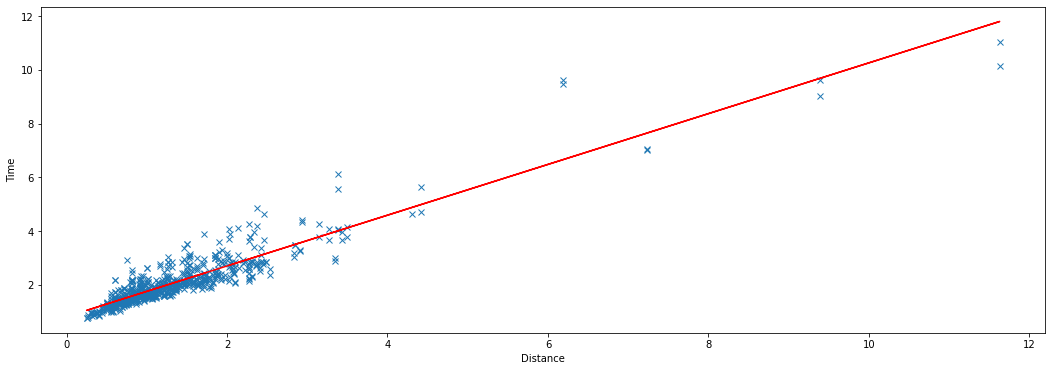

In [18]:

# Import minimisation function
from scipy.optimize import minimize

# A function to calculate the sum of the residuals
# We want to minimise this to maximise R Squared
def get_residual_square_sum(values):
    # Split out m and c from provided input
    m = values[0]
    c = values[1]
    # Apply y = mx + c to all points
    opt_guess = df["Distance (Kms)"].apply(lambda x: straight_line(x, m, c))
    # Square residuals
    square_residuals = (df["Un-impeded Running Time (Mins)"] - opt_guess) ** 2
    # Return sum of the residuals
    return square_residuals.sum()

# Run
result = minimize(get_residual_square_sum, [m_guess, c_guess])

# Pull out optimised m and c
m_opt = result.x[0]
c_opt = result.x[1]

# Apply optimised results to our data frame
df["opt"] = df["Distance (Kms)"].apply(lambda x: straight_line(x, m_opt, c_opt))

# Plot against the data
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.plot(df["Distance (Kms)"], df["opt"], color="red")
plt.xlabel("Distance")
plt.ylabel("Time")
# Display
plt.show()


We can now also calculate the R Squared score for this line:

In [19]:

opt_r_2 = 1 - (get_residual_square_sum([m_opt, c_opt]) / df["squared_deviation"].sum())

print("R_2 : {}".format(opt_r_2))


R_2 : 0.8587909784274484


Much better!

Note, I've deliberately gone a roundabout way of doing this in order to explain how it works. A much simpler way would be to use the SciPy library [curve fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function. As below:

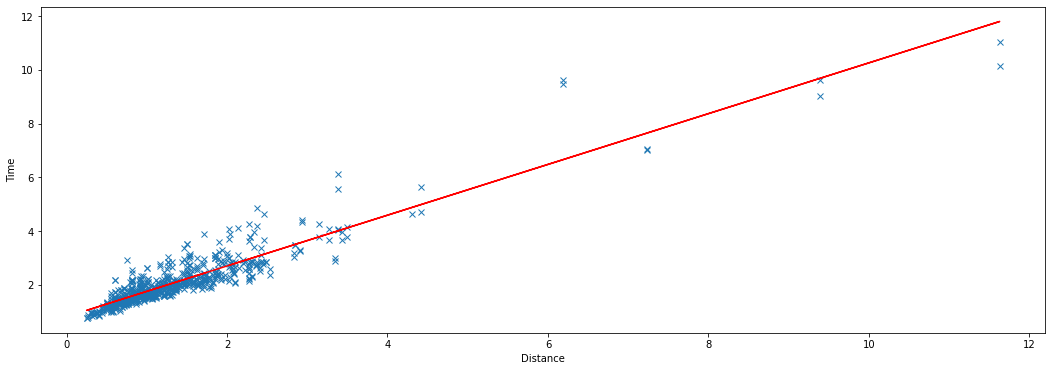

In [21]:

# Import curve fit function
from scipy.optimize import curve_fit

# Run linear regression
popt, pcov = curve_fit(straight_line, df["Distance (Kms)"], df["Un-impeded Running Time (Mins)"])

# Apply optimised results to our data frame
df["opt_2"] = df["Distance (Kms)"].apply(lambda x: straight_line(x, *popt))

# Plot against the data
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.plot(df["Distance (Kms)"], df["opt_2"], color="red")
plt.xlabel("Distance")
plt.ylabel("Time")
# Display
plt.show()


Similarly, let's use Scikit-learn to calculate the R Squared

In [23]:

# Import function
from sklearn.metrics import r2_score

alt_r_2 = r2_score(df["Un-impeded Running Time (Mins)"], df["opt_2"])

print("R_2 : {}".format(opt_r_2))


R_2 : 0.8587909784274484


The same as before!

# Does our line have to be linear?

No!

## Question

Considering the `curve_fit` solution, how might you change it to fit some other kind of line?


## Answer

See below example for a quadratic line

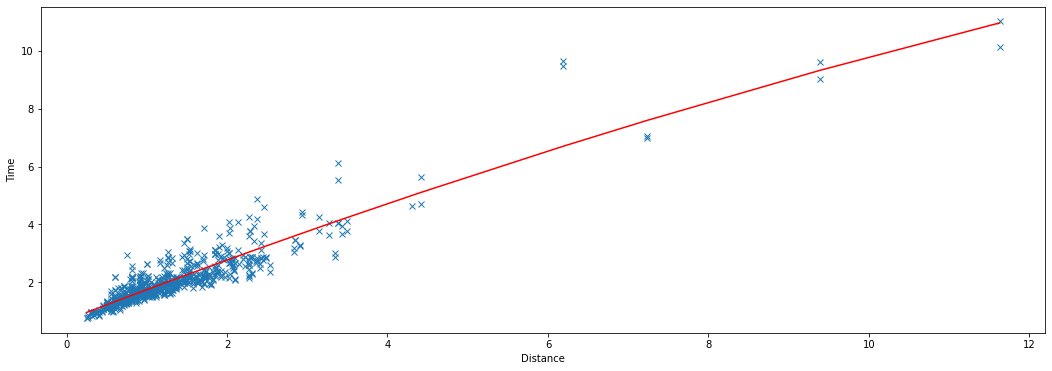

In [28]:

# Quadratic function
def quad(x, c2, c1, c0):
    return (x**2)*c2 + x*c1 + c0

# Run least squares regression
popt, pcov = curve_fit(quad, df["Distance (Kms)"], df["Un-impeded Running Time (Mins)"])

# Apply optimised results to our data frame
df["quardatic"] = df["Distance (Kms)"].apply(lambda x: quad(x, *popt))

# To display the quadratic line correctly we need to sort by distance before plotting
df = df.sort_values("Distance (Kms)")

# Plot against the data
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.plot(df["Distance (Kms)"], df["quardatic"], color="red")
plt.xlabel("Distance")
plt.ylabel("Time")
# Display
plt.show()


We can also work out an R Squared for our quadratic fit!

In [30]:
quad_r_2 = r2_score(df["Un-impeded Running Time (Mins)"], df["quardatic"])

print("R_2 : {}".format(quad_r_2))

R_2 : 0.8629514669506747


Even better than the linear fit!

This methodology can be applied to fit any kind of line, think of a gaussian distribution for example!


# Regression as Machine Learning

Regression is often considered a machine learning model, many data scientists will use a linear regression model as a baseline before considering more complex solutions.

The relative simplicity of linear regression despite the reputation of machine learning underlines that at its core, all machine learning is maths and stats.

## Scikit-learn

Scikit-learn is a popular python library for machine learning. It contains implementations of a wide array of machine learning algorithms - and importantly they all follow the same implementation pattern, so if you learn how to do linear regression in Scikit-learn, you can do any kind of regression in Scikit-learn.

See below how we can achieve the same linear regression as our earlier examples using Scikit-learn:

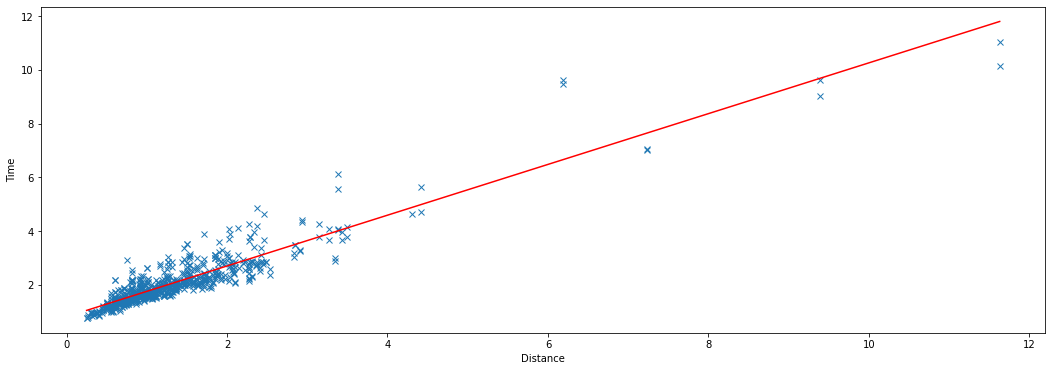

In [33]:

# Import regression model
from sklearn.linear_model import LinearRegression

# Create an instance of the regression class
my_model = LinearRegression()

# Fit model
my_model.fit(df[["Distance (Kms)"]], df["Un-impeded Running Time (Mins)"])

# Predict using model
predictions = my_model.predict(df[["Distance (Kms)"]])

# Plot against the data
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.plot(df["Distance (Kms)"], predictions, color="red")
plt.xlabel("Distance")
plt.ylabel("Time")
# Display
plt.show()


Now, the benefit of Scikit-learn is that say if we wanted to try [ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), all we need to do is swap `LinearRegression` for `Ridge`.

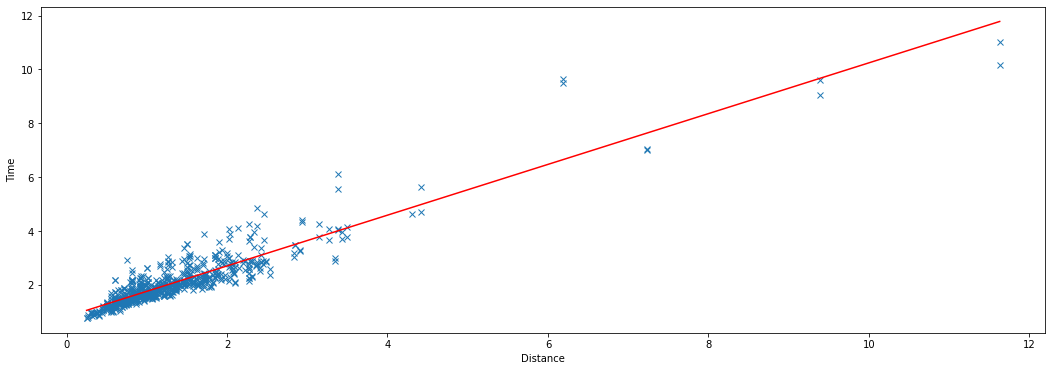

In [34]:

# Import regression model
from sklearn.linear_model import Ridge

# Create an instance of the regression class
my_model = Ridge()

# Fit model
my_model.fit(df[["Distance (Kms)"]], df["Un-impeded Running Time (Mins)"])

# Predict using model
predictions = my_model.predict(df[["Distance (Kms)"]])

# Plot against the data
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(df["Distance (Kms)"], 
         df["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.plot(df["Distance (Kms)"], predictions, color="red")
plt.xlabel("Distance")
plt.ylabel("Time")
# Display
plt.show()


## Train & Test Sets

Another technique common in machine learning is the creation of train and test sets. These are random samples of your overall data set, one is used for training the model and the other for testing (evaluating R Squared). This allows us as data scientists to fairly evaluate different models against each other as some types of machine learning model will significantly over perform on the data they were trained on.

Scikit-learn's separate `fit` and `predict` methods make the use of train and test sets very easy. See example below:


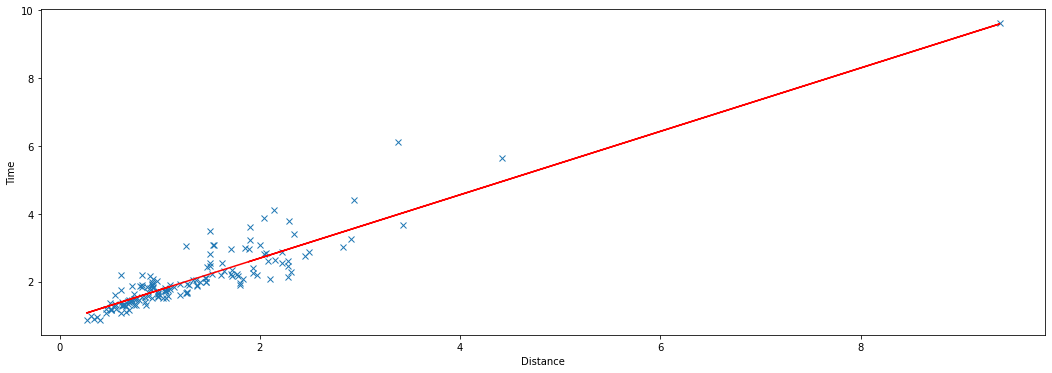

In [35]:

# Import sklearn train test split function
from sklearn.model_selection import train_test_split

# Create an instance of the regression class
my_model = LinearRegression()

# Split data into a test and training set
train, test = train_test_split(df, test_size=0.2)

# Fit model (train)
my_model.fit(train[["Distance (Kms)"]], train["Un-impeded Running Time (Mins)"])

# Predict using model (test)
predictions = my_model.predict(test[["Distance (Kms)"]])

# Plot against the data (test)
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(test["Distance (Kms)"], 
         test["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.plot(test["Distance (Kms)"], predictions, color="red")
plt.xlabel("Distance")
plt.ylabel("Time")
# Display
plt.show()


And of course, we want to calculate the R Squared from the test dataset

In [36]:
ml_r_2 = r2_score(test["Un-impeded Running Time (Mins)"], predictions)

print("R_2 : {}".format(ml_r_2))

R_2 : 0.8403096032480306


Our performance  has changed slightly vs. training on the full dataset, but not significantly. This is a price worth paying to be able to fairly evaluate the technique against others.

# Multi-Variate Regression

You may notice, using Scikit-learn we are no longer performing a quadratic fit. Typically when using regression as a machine learning technique, we stick with a linear regression algorithm, but instead work in a higher number of dimensions. i.e. until now we have only been using the distance to estimate time. What if we used both distance and distance squared to estimate time? This is equivalent to a quadratic fit, but (as you will see) more extensible.

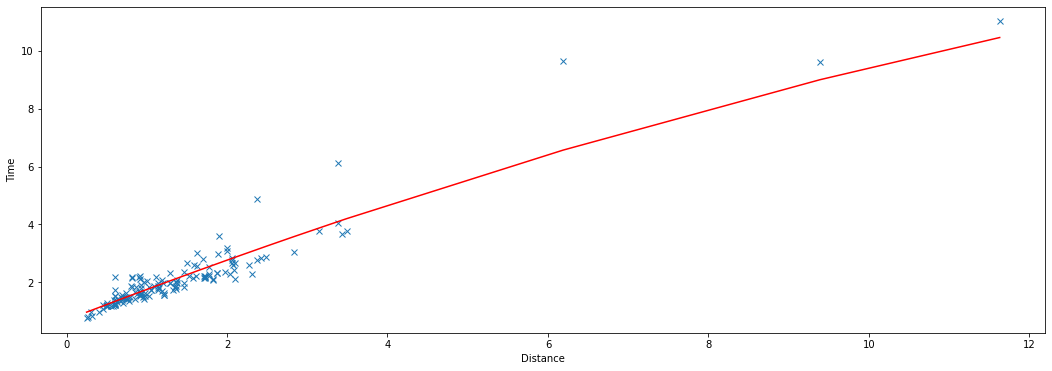

In [38]:

# Add a distance squared column to our data
df["Square Distance"] = df["Distance (Kms)"] ** 2

# Create an instance of the regression class
my_model = LinearRegression()

# Split data into a test and training set
train, test = train_test_split(df, test_size=0.2)

# Fit model in 2 dimentions (train)
my_model.fit(train[["Distance (Kms)", "Square Distance"]], train["Un-impeded Running Time (Mins)"])

# To display the quadratic line correctly we need to sort by distance before plotting
test = test.sort_values("Distance (Kms)")

# Predict using model (test)
predictions = my_model.predict(test[["Distance (Kms)", "Square Distance"]])

# Plot against the data (test)
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(test["Distance (Kms)"], 
         test["Un-impeded Running Time (Mins)"],
         linestyle=" ",  # Invisible line style
         marker="x")     # Cross markers
plt.plot(test["Distance (Kms)"], predictions, color="red")
plt.xlabel("Distance")
plt.ylabel("Time")
# Display
plt.show()


And checking the R Squared...

In [39]:
mv_r_2 = r2_score(test["Un-impeded Running Time (Mins)"], predictions)

print("R_2 : {}".format(mv_r_2))

R_2 : 0.8954129878065421


We now see a significant improvement in accuracy! (The slight difference from before may be owing to a smaller test data set)

We can add any number of additional variables using this technique. Considering our dataset, a useful feature to add would be underground line - logically we know different lines run different sorts of trains, which might perform differently. But line is a categorical feature, so how might we add it to a regression model?

## Question

Why is adding a categorical feature such as line tricky, and how might we achieve it?

## Answer

We can use One-Hot Encoding to add a new "1 or 0" column for each line.

## One-Hot Encoding

One-Hot Encoding is a popular technique to add categorical variables to regression models, by changing them into a series of simpler numeric dimensions. Each new dimension will correspond to an underground line and have a value of either 1 or 0. e.g.

In [43]:

# Build a set of all lines
all_lines = set(df["Line"])

# For each line, add a new One-Hot Encoded column
for line in all_lines:
    # Default to 0
    df[line] = 0
    # If the row is for this line, change to 1
    df.loc[df["Line"] == line, line] = 1
    
# Build a list of all our features by combining all_lines with existing features
features = ["Distance (Kms)", "Square Distance"] + list(all_lines)

# Display our new feature set
display(df[features])


,Distance (Kms),Square Distance,Bakerloo,H & C,Victoria,Northern,East London,Circle,Piccadilly,Metropolitan,District,Central,Jubilee,Waterloo & City
365,0.25,0.0625,0,0,0,0,0,0,1,0,0,0,0,0
396,0.25,0.0625,0,0,0,0,0,0,1,0,0,0,0,0
257,0.27,0.0729,0,0,0,1,0,0,0,0,0,0,0,0
304,0.27,0.0729,0,0,0,1,0,0,0,0,0,0,0,0
594,0.31,0.0961,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,7.24,52.4176,0,0,0,0,0,0,0,1,0,0,0,0
458,9.39,88.1721,0,0,0,0,0,0,0,1,0,0,0,0
478,9.39,88.1721,0,0,0,0,0,0,0,1,0,0,0,0
487,11.63,135.2569,0,0,0,0,0,0,0,1,0,0,0,0


We now have 14 dimensions!

Notice how only one line ever has a value of one. Hence the name, One-Hot Encoding.

It's now easy to ammend our code to use our new feature set:

In [45]:

# Create an instance of the regression class
my_model = LinearRegression()

# Split data into a test and training set
train, test = train_test_split(df, test_size=0.2)

# Fit model (train)
my_model.fit(train[features], train["Un-impeded Running Time (Mins)"])

# To display the quadratic line correctly we need to sort by distance before plotting
test = test.sort_values("Distance (Kms)")

# Predict using model (test)
predictions = my_model.predict(test[features])


Now we are in a high-dimensional space, it no-longer makes sense to plot our predictions as a line. An alternative way to get a feel for our model performance is to plot predicted against actual.

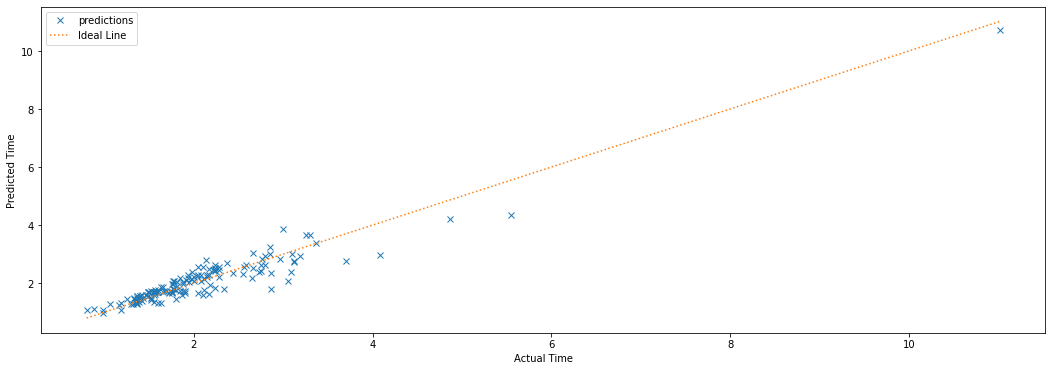

In [50]:
fig, ax = plt.subplots(figsize=(18, 6))

# Predictions
plt.plot(test["Un-impeded Running Time (Mins)"], predictions, 
         linestyle=" ", marker="x", label="predictions")

# Ideal Trend
plt.plot(test["Un-impeded Running Time (Mins)"], test["Un-impeded Running Time (Mins)"], 
         linestyle=":", label="Ideal Line")

plt.xlabel("Actual Time")
plt.ylabel("Predicted Time")
plt.legend()
plt.show()


Or of course, we can directly compare to our earlier model by using the R Squared score:

In [48]:
oh_r_2 = r2_score(test["Un-impeded Running Time (Mins)"], predictions)

print("R_2 : {}".format(oh_r_2))

R_2 : 0.9041987024913525


Once again, our R Squared has improved! Verifying our decision to add in the One-Hot Encoded line information.

# Recap

Today we have learnt:
* How least squares regression works by minimising the squared residuals
* How to extend least squares regression to fit any kind of line
* Regression in the context of machine learning
* How to use Scikit-learn
* Train/Test splits
* Multi-variate regression & one-hot encoding

# Homework

Watch [this video](https://www.youtube.com/watch?v=yj9rK6z8054) with my colleages, James and Tajhame. James and Tajhame discuss how good feature engineering is key for machine learning and explain with a regression model for a [Kaggle](https://www.kaggle.com/) dataset.

Have a go at building your own regression model either for the [same dataset] as in the video or one of your choice.